<a href="https://colab.research.google.com/github/Madushani-Weerasekara/PyTorch-Linear-Classification/blob/main/PyTorch_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


In [118]:
# Load in the dataset
from sklearn.datasets import load_breast_cancer


In [119]:
# Load the data
data = load_breast_cancer()

In [120]:
# Check the type of data
type(data)

sklearn.utils._bunch.Bunch

In [121]:
# Note : It is a bumch object.

# This basically act like a dictionary where you can treat the keys like atributes.
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [122]:
# 'data (the atribute) means input data
data.data.shape
# It has 569 samples and 30 features

(569, 30)

In [123]:
# Targets
data.target
# Note how the targets are just 0s and 1s
# Normally when you have K targets, they  are labeled 0..K-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [124]:
# Their meaning is not lost
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [125]:
# There are also 569 corresponding targets
data.target.shape

(569,)

In [126]:
# You can also determine the meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [127]:
# Normally we would put all of our imports at the top
from sklearn.model_selection import train_test_split

# Split the data into train and test
# this let us simulate how our model will perform in the future
x_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.33)
N,D = x_train.shape


In [128]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(X_test)


In [129]:
# Build the model
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

In [130]:
# Loss and Optimizer
criterion = nn.BCELoss()
Optimizer = torch.optim.Adam(model.parameters())

In [131]:
# Convert data into torch tensor
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [132]:
# Train the model
n_epochs = 1000

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losess = np.zeros(n_epochs)

for it in range(n_epochs):
  # Zero the parameter gradients
  Optimizer.zero_grad()

  # Forward pass
  outputs = model(x_train)
  loss = criterion(outputs,y_train)

# Forward pass
  outputs = model(x_train)
  loss = criterion(outputs,y_train)

# Backward and Optimize
  loss.backward()
  Optimizer.step()

 # Get test loss
  outputs_test = model(x_test)
  loss_test = criterion(outputs_test, y_test)


# Save losses
  train_losses[it] = loss.item()
  test_losess[it] = loss_test.item()


if (it+1) % 50 == 0:
  print(f'Epoch {it+1}/{n_epochs},Train Loss: {loss.item():.4f},Test Loss: {loss.item()}')


Epoch 1000/1000,Train Loss: 0.1033,Test Loss: 0.1032506674528122


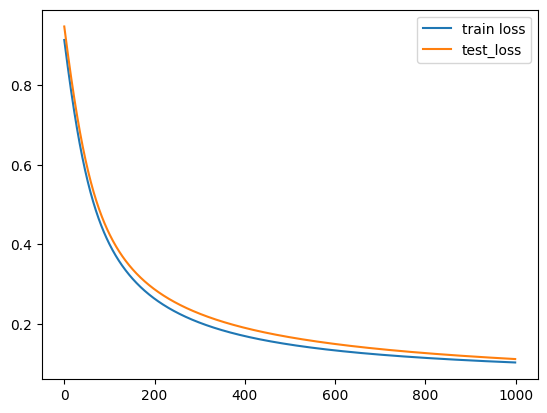

In [133]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses,label='train loss')
plt.plot(test_losess, label = 'test_loss')
plt.legend()
plt.show()


In [134]:
# Get accuracy
with torch.no_grad():
  p_train = model(x_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(x_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)

  print(f'Train acc: {train_acc: .4f},Test acc: {test_acc: .4f}')

Train acc:  0.9816,Test acc:  0.9840


#Save and load the model

In [135]:
# look at the state dict
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-2.4204e-01, -4.1961e-01, -4.2241e-01, -2.3985e-01, -2.1682e-01,
                       -1.8916e-01, -2.2687e-01, -2.1295e-01, -2.2178e-01,  5.2858e-01,
                       -3.4723e-01,  2.8166e-01, -2.3198e-01, -1.9446e-01, -1.6876e-01,
                       -3.8064e-04, -2.5257e-02, -1.7832e-01,  1.2803e-01,  4.6005e-01,
                       -2.7909e-01, -5.8163e-01, -3.6262e-01, -4.0003e-01, -3.5013e-01,
                       -2.0552e-01, -2.7232e-01, -1.9849e-01, -5.0120e-01, -3.6885e-01]])),
             ('0.bias', tensor([0.4414]))])

In [136]:
# Save the model
torch.save(model.state_dict(), 'myfirstmodel.pt')

In [137]:
!ls

myfirstmodel.pt  sample_data


In [138]:
# Load the model
# Note : this makes more sense and is more compact when your model is a big class, as we will be seeing later.
model2 = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

model2.load_state_dict(torch.load('myfirstmodel.pt'))

<All keys matched successfully>

In [139]:
# Evaluate the new model
# Result should be the same
with torch.no_grad():
  p_train = model2(x_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model2(x_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)



print(f'Train acc: {train_acc: .4f}, Test acc: {test_acc: .4f}')


Train acc:  0.9816, Test acc:  0.9840


In [141]:
# Download the model
from google.colab import files
files.download('myfirstmodel.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>